In [1]:
import pandas as pd
import seaborn as sns
import scipy
import numpy as np
import os
from sklearn.model_selection import (TimeSeriesSplit, KFold, ShuffleSplit,
                                     StratifiedKFold, GroupShuffleSplit,
                                     GroupKFold, StratifiedShuffleSplit)

import matplotlib.pyplot as plt
from matplotlib.patches import Patch

print("Using pandas %s version" % pd.__version__)
print("Using seaborn %s version"% sns.__version__)
print("Using scipy %s version" % scipy.__version__)

Using pandas 1.1.3 version
Using seaborn 0.11.0 version
Using scipy 1.5.2 version


In [2]:
movies_names = ['MovieID','Title','Genres']

movies = pd.read_table(r'C:\Projects\RecSys2020\datasets\ml1m\movies.dat',
                        sep='::',
                        header=None,
                        names=movies_names,
                        encoding='latin-1',
                        engine='python')

movies.head()

ratings_names = ['UserID','MovieID','Rating','Timestamp']

ratings = pd.read_table(r'C:\Projects\RecSys2020\datasets\ml1m\ratings.dat',sep='::',header=None,
                        engine='python',names=ratings_names)

ratings.head()


users_names = ['UserID','Gender','Age','Occupation','Zip-code']

users = pd.read_table(r'C:\Projects\RecSys2020\datasets\ml1m\users.dat',sep='::',
                        engine='python',header=None,names=users_names)


In [3]:
# create one merged DataFrame
movie_ratings = pd.merge(movies, ratings)
lens = pd.merge(movie_ratings, users)

In [4]:
lens.head()

,MovieID,Title,Genres,UserID,Rating,Timestamp,Gender,Age,Occupation,Zip-code
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268,F,1,10,48067
1,48,Pocahontas (1995),Animation|Children's|Musical|Romance,1,5,978824351,F,1,10,48067
2,150,Apollo 13 (1995),Drama,1,5,978301777,F,1,10,48067
3,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Fantasy|Sci-Fi,1,4,978300760,F,1,10,48067
4,527,Schindler's List (1993),Drama|War,1,5,978824195,F,1,10,48067


In [5]:
# Generate the class/group data
n_points = len(lens)
lens['sexcode'] = pd.factorize(lens['Gender'])[0] + 1
ageGroups = pd.factorize(lens['Age'])[0] + 1
occupationGroups = pd.factorize(lens['Occupation'])[0] + 1
timestampGroups = pd.factorize(lens['Timestamp'])[0] + 1

X = np.array(lens['Rating']) #np.random.randn(100, 10)
y = np.array(lens['sexcode']).T

n_splits = 5

np.random.seed(1338)
cmap_data = plt.cm.Paired
cmap_cv = plt.cm.coolwarm

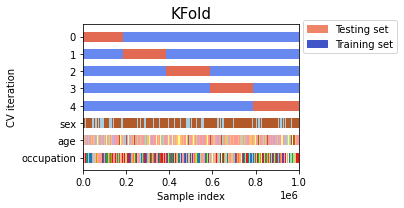

In [6]:
def plot_cv_indices(cv, X, y, group, group2, ax, n_splits, lw=10):
    """Create a sample plot for indices of a cross-validation object."""

    # Generate the training/testing visualizations for each CV split
    for ii, (tr, tt) in enumerate(cv.split(X=X, y=y, groups=group)):
        # Fill in indices with the training/test groups
        indices = np.array([np.nan] * len(X))
        indices[tt] = 1
        indices[tr] = 0

        # Visualize the results
        ax.scatter(range(len(indices)), [ii + .5] * len(indices),
                   c=indices, marker='_', lw=lw, cmap=cmap_cv,
                   vmin=-.2, vmax=1.2)

    # Plot the data classes and groups at the end
    ax.scatter(range(len(X)), [ii + 1.5] * len(X),
               c=y, marker='_', lw=lw, cmap=cmap_data)

    ax.scatter(range(len(X)), [ii + 2.5] * len(X),
               c=group, marker='_', lw=lw, cmap=cmap_data)

    ax.scatter(range(len(X)), [ii + 3.5] * len(X),
               c=group2, marker='_', lw=lw, cmap=cmap_data)
    
    # Formatting
    labels = ['sex', 'age', 'occupation']
    yticklabels = list(range(n_splits)) + labels
    ax.set(yticks=np.arange(n_splits+3) + .5, yticklabels=yticklabels,
           xlabel='Sample index', ylabel="CV iteration",
           ylim=[n_splits+ len(labels) +.2, -.2], xlim=[0, n_points])
    ax.set_title('{}'.format(type(cv).__name__), fontsize=15)
    return ax


cvs = [KFold]
        #,GroupKFold, ShuffleSplit, StratifiedKFold,
        #GroupShuffleSplit, StratifiedShuffleSplit, TimeSeriesSplit]

for cv in cvs:
    this_cv = cv(n_splits=n_splits)
    fig, ax = plt.subplots(figsize=(6, 3))
    plot_cv_indices(this_cv, X, y, ageGroups, occupationGroups, ax, n_splits)

    ax.legend([Patch(color=cmap_cv(.8)), Patch(color=cmap_cv(.02))],
              ['Testing set', 'Training set'], loc=(1.02, .8))
    # Make the legend fit
    plt.tight_layout()
    fig.subplots_adjust(right=.7)
plt.show()

In [10]:
cv = TimeSeriesSplit(n_splits)
splits = []
for ii, (tr, tt) in enumerate(cv.split(X=lens, y=y, groups=timestampGroups)):
    splits.append((tr, tt))

print(len(splits[0][1]))

for i in splits:
    print( len(i[0]))

166701
166704
333405
500106
666807
833508


In [11]:
print([[len(t) for t in split] for split in splits])
splited = [[t for t in split] for split in splits]


[[166704, 166701], [333405, 166701], [500106, 166701], [666807, 166701], [833508, 166701]]


In [13]:
for split in splits:
    print(len(split))
#1-data-test.txt
#1-data-train.txt

2
2
2
2
2


In [14]:
data_dir = r'C:\Projects\RecSys2020\datasets\ml1m\\TimeSeriesSplit\\'
cvs = [KFold,GroupKFold, ShuffleSplit, StratifiedKFold,
        GroupShuffleSplit, StratifiedShuffleSplit, TimeSeriesSplit]
    
cv = TimeSeriesSplit(n_splits)
for fold, (train, test) in enumerate(cv.split(X=lens, y=y, groups=timestampGroups)):
    fold += 1
    print(fold)
    print(fold ,' train=' , len(lens[lens.index.isin(splits[i][0])]))
    print(fold ,' test=' , len(lens[lens.index.isin(splits[i][1])]))
    
    train = lens[['UserID', 'MovieID', 'Rating', 'Timestamp']][lens.index.isin(train)]
    test = lens[['UserID', 'MovieID', 'Rating', 'Timestamp']][lens.index.isin(test)]

    train.to_csv(os.path.join(data_dir,str(fold) +'-data-train.txt'))
    test.to_csv(os.path.join(data_dir,str(fold) +'-data-test.txt'))
    

1


TypeError: list indices must be integers or slices, not tuple

In [15]:
lens[['UserID', 'MovieID', 'Rating', 'Timestamp']][lens.index.isin(splits[i][0])]

TypeError: list indices must be integers or slices, not tuple

In [16]:
data_dir = r'C:\Projects\RecSys2020\datasets\ml1m\\'
cvs = [KFold, ShuffleSplit, StratifiedKFold,
        GroupShuffleSplit, StratifiedShuffleSplit] 
#, TimeSeriesSplit, GroupKFold]
#g = timestampGroups
g = np.array(lens['sexcode']).T
for cv in cvs:
    this_cv = cv(n_splits=n_splits)
    this_cv_name = type(this_cv).__name__
    dir = os.path.join(data_dir,this_cv_name)
    if not os.path.exists(dir):
        os.mkdir(dir)
        
    for fold, (train, test) in enumerate(this_cv.split(X=lens, y=y, groups=g)):
        fold += 1
        print()
        print(this_cv_name, fold ,' train=' , len(lens[lens.index.isin(train)]))
        print(this_cv_name, fold ,' test=' , len(lens[lens.index.isin(test)]))

        train = lens[['UserID', 'MovieID', 'Rating', 'Timestamp']][lens.index.isin(train)]
        test = lens[['UserID', 'MovieID', 'Rating', 'Timestamp']][lens.index.isin(test)]

        train.to_csv(os.path.join(dir,str(fold) +'-data-train.txt'))
        test.to_csv(os.path.join(dir,str(fold) +'-data-test.txt'))
    


KFold 1  train= 800167
KFold 1  test= 200042

KFold 2  train= 800167
KFold 2  test= 200042

KFold 3  train= 800167
KFold 3  test= 200042

KFold 4  train= 800167
KFold 4  test= 200042

KFold 5  train= 800168
KFold 5  test= 200041

ShuffleSplit 1  train= 900188
ShuffleSplit 1  test= 100021

ShuffleSplit 2  train= 900188
ShuffleSplit 2  test= 100021

ShuffleSplit 3  train= 900188
ShuffleSplit 3  test= 100021

ShuffleSplit 4  train= 900188
ShuffleSplit 4  test= 100021

ShuffleSplit 5  train= 900188
ShuffleSplit 5  test= 100021

StratifiedKFold 1  train= 800167
StratifiedKFold 1  test= 200042

StratifiedKFold 2  train= 800167
StratifiedKFold 2  test= 200042

StratifiedKFold 3  train= 800167
StratifiedKFold 3  test= 200042

StratifiedKFold 4  train= 800167
StratifiedKFold 4  test= 200042

StratifiedKFold 5  train= 800168
StratifiedKFold 5  test= 200041

GroupShuffleSplit 1  train= 753769
GroupShuffleSplit 1  test= 246440

GroupShuffleSplit 2  train= 753769
GroupShuffleSplit 2  test= 246440


In [17]:
def split(cvs, groups):
    for cv in cvs:
        this_cv = cv(n_splits=n_splits)
        this_cv_name = type(this_cv).__name__
        dir = os.path.join(data_dir,this_cv_name)
        if not os.path.exists(dir):
            os.mkdir(dir)

        for fold, (train, test) in enumerate(this_cv.split(X=lens, y=y, groups=groups)):
            fold += 1
            print()
            print(this_cv_name, fold ,' train=' , len(lens[lens.index.isin(train)]))
            print(this_cv_name, fold ,' test=' , len(lens[lens.index.isin(test)]))

            train = lens[['UserID', 'MovieID', 'Rating', 'Timestamp']][lens.index.isin(train)]
            test = lens[['UserID', 'MovieID', 'Rating', 'Timestamp']][lens.index.isin(test)]

            train.to_csv(os.path.join(dir,str(fold) +'-data-train.txt'), 
                         index=False, header=False, sep='\t')
            test.to_csv(os.path.join(dir,str(fold) +'-data-test.txt'),
                        index=False, header=False, sep='\t')

data_dir = r'C:\Projects\RecSys2020\datasets\ml1m\\'
cvs = [KFold, ShuffleSplit, StratifiedKFold,
        GroupShuffleSplit, StratifiedShuffleSplit] 
split(cvs, np.array(lens['sexcode']).T)
split([TimeSeriesSplit], timestampGroups)
#, TimeSeriesSplit, GroupKFold]
#g = np.array(lens['sexcode']).T


KFold 1  train= 800167
KFold 1  test= 200042

KFold 2  train= 800167
KFold 2  test= 200042

KFold 3  train= 800167
KFold 3  test= 200042

KFold 4  train= 800167
KFold 4  test= 200042

KFold 5  train= 800168
KFold 5  test= 200041

ShuffleSplit 1  train= 900188
ShuffleSplit 1  test= 100021

ShuffleSplit 2  train= 900188
ShuffleSplit 2  test= 100021

ShuffleSplit 3  train= 900188
ShuffleSplit 3  test= 100021

ShuffleSplit 4  train= 900188
ShuffleSplit 4  test= 100021

ShuffleSplit 5  train= 900188
ShuffleSplit 5  test= 100021

StratifiedKFold 1  train= 800167
StratifiedKFold 1  test= 200042

StratifiedKFold 2  train= 800167
StratifiedKFold 2  test= 200042

StratifiedKFold 3  train= 800167
StratifiedKFold 3  test= 200042

StratifiedKFold 4  train= 800167
StratifiedKFold 4  test= 200042

StratifiedKFold 5  train= 800168
StratifiedKFold 5  test= 200041

GroupShuffleSplit 1  train= 246440
GroupShuffleSplit 1  test= 753769

GroupShuffleSplit 2  train= 753769
GroupShuffleSplit 2  test= 246440
